<a href="https://colab.research.google.com/github/VIVEKPATIL12/U-Net-Segmentation/blob/main/Copy_of_Road_Surface_Classification_Image_Based_region.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Download the dataset
# !rm -rf /content/dataset_temp/
# !rm -rf /content/Image/
!git clone https://github.com/aamirmiy/Boreas.git
#!rm -rf /content/dataset_temp/
%ls /content/

Cloning into 'Boreas'...
remote: Enumerating objects: 3008, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3008 (delta 0), reused 3 (delta 0), pack-reused 3005 (from 1)
Receiving objects: 100% (3008/3008), 190.54 MiB | 25.73 MiB/s, done.
Boreas/  sample_data/


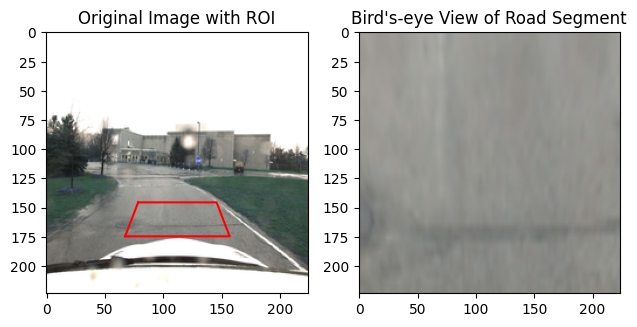

array([[[159, 156, 151],
        [160, 157, 152],
        [161, 157, 152],
        ...,
        [164, 163, 159],
        [166, 166, 162],
        [166, 165, 160]],

       [[158, 156, 151],
        [160, 156, 151],
        [161, 157, 152],
        ...,
        [163, 162, 158],
        [164, 164, 160],
        [165, 164, 159]],

       [[158, 156, 150],
        [159, 156, 151],
        [161, 156, 152],
        ...,
        [161, 161, 156],
        [162, 162, 158],
        [164, 164, 158]],

       ...,

       [[132, 131, 126],
        [132, 131, 126],
        [132, 131, 126],
        ...,
        [135, 136, 130],
        [136, 136, 131],
        [137, 136, 131]],

       [[132, 132, 126],
        [132, 131, 126],
        [132, 131, 126],
        ...,
        [136, 136, 131],
        [137, 137, 131],
        [136, 135, 131]],

       [[132, 132, 126],
        [132, 132, 126],
        [132, 131, 126],
        ...,
        [137, 137, 131],
        [137, 137, 132],
        [136, 135, 130]]], dtype=uint8)
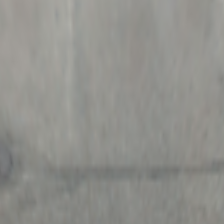

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/Boreas/wet/1619726151884919.png')
# Step 1: Define region of interest (ROI) points
height, width = image.shape[:2]

roi_points = np.float32([
      [width * 0.3, height * 0.78], #Bottom-left
      [width * 0.7, height * 0.78],  # Bottom-right
      [width * 0.65, height * 0.65],  # Top-right
      [width * 0.35, height * 0.65]  # Top-left
])
# Step 2: Define destination points for bird's-eye view
dst_points = np.float32([
    (0, height),
    (width, height),
    (width, 0),
    (0, 0)
])

# Step 3: Compute the perspective transform matrix
matrix = cv2.getPerspectiveTransform(roi_points, dst_points)

# Step 4: Apply the perspective transformation
road_segment = cv2.warpPerspective(image, matrix, (width, height))

# Display the results
#plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image with ROI")
plt.plot(roi_points[:, 0], roi_points[:, 1], 'r-')
plt.plot([roi_points[-1, 0], roi_points[0, 0]], [roi_points[-1, 1], roi_points[0, 1]], 'r-')

plt.subplot(1, 2, 2)
plt.imshow(road_segment)
plt.title("Bird's-eye View of Road Segment")

plt.tight_layout()
plt.show()


road_segment


In [ ]:
def apply_birds_eye_view(image):
  height, width = image.shape[:2]
  roi_points = np.float32([
        [width * 0.3, height * 0.78], #Bottom-left
        [width * 0.7, height * 0.78],  # Bottom-right
        [width * 0.65, height * 0.65],  # Top-right
        [width * 0.35, height * 0.65]  # Top-left
  ])
  # Step 2: Define destination points for bird's-eye view
  dst_points = np.float32([
      (0, height),
      (width, height),
      (width, 0),
      (0, 0)
  ])

  # Step 3: Compute the perspective transform matrix
  matrix = cv2.getPerspectiveTransform(roi_points, dst_points)

  # Step 4: Apply the perspective transformation
  road_segment = cv2.warpPerspective(image, matrix, (width, height))
  return road_segment

In [ ]:
def process_image(img_path):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    road_segment = apply_birds_eye_view(image)

    height, width = road_segment.shape[:2]
    left_half = road_segment[:, :width//2]
    right_half = road_segment[:, width//2:]

    # Resize left and right halves to 224x224
    left_half_resized = cv2.resize(left_half, (224, 224))
    right_half_resized = cv2.resize(right_half, (224, 224))

    return left_half_resized, right_half_resized

In [ ]:
# Create Train and Test folders
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

classes = ['dry', 'snowy', 'wet']  # replace with your actual class names
data_dir = 'Boreas'

train_dir = 'Dataset/train'
val_dir = 'Dataset/val'
test_dir = 'Dataset/test'

# Create train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok = True)

for cls in classes:
    # Create class-specific train and test directories
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_dir, cls), exist_ok=True)

    # Get a list of all image files for this class
    image_files = os.listdir(os.path.join(data_dir, cls))

    # Split the files into train and test sets
    train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)  # 80% train, 20% test
    train_files, val_files = train_test_split(train_files, test_size =0.2, random_state=42)
    # Copy the train files into the train directory
    for file in train_files:
        shutil.copy(os.path.join(data_dir, cls, file), os.path.join(train_dir, cls, file))
    for file in val_files:
        shutil.copy(os.path.join(data_dir, cls, file), os.path.join(val_dir, cls, file))
    # Copy the test files into the test directory
    for file in test_files:
        shutil.copy(os.path.join(data_dir, cls, file), os.path.join(test_dir, cls, file))

    for file_list, target_dir in [(train_files, train_dir), (val_files, val_dir), (test_files, test_dir)]:
        for file in file_list:
            left_half, right_half = process_image(os.path.join(data_dir, cls, file))
            cv2.imwrite(os.path.join(target_dir, cls, f'left_{file}'), cv2.cvtColor(left_half, cv2.COLOR_RGB2BGR))
            cv2.imwrite(os.path.join(target_dir, cls, f'right_{file}'), cv2.cvtColor(right_half, cv2.COLOR_RGB2BGR))


In [ ]:
import re

In [ ]:
def remove_original_images(directory):
    # Compile regex patterns for left and right image filenames
    left_pattern = re.compile(r'^left_.*\.png$')
    right_pattern = re.compile(r'^right_.*\.png$')

    # Walk through all subdirectories
    for root, dirs, files in os.walk(directory):
        for file in files:
            # If the file is not a left or right image, it's an original image
            if not left_pattern.match(file) and not right_pattern.match(file):
                file_path = os.path.join(root, file)
                print(f"Removing: {file_path}")
                os.remove(file_path)

In [ ]:
val= 'Dataset/test'

remove_original_images(val)

Removing: Dataset/test/snowy/1611678222486071.png
Removing: Dataset/test/snowy/1611678498487017.png
Removing: Dataset/test/snowy/1611676859531344.png
Removing: Dataset/test/snowy/1611678489986987.png
Removing: Dataset/test/snowy/1611679222689493.png
Removing: Dataset/test/snowy/1611678779287979.png
Removing: Dataset/test/snowy/1611677130732327.png
Removing: Dataset/test/snowy/1611678313086382.png
Removing: Dataset/test/snowy/1611679341489899.png
Removing: Dataset/test/snowy/1611678835088166.png
Removing: Dataset/test/snowy/1611679288689720.png
Removing: Dataset/test/snowy/1611679333689872.png
Removing: Dataset/test/snowy/1611678681987646.png
Removing: Dataset/test/snowy/1611677212632616.png
Removing: Dataset/test/snowy/1611677627834043.png
Removing: Dataset/test/snowy/1611678319086403.png
Removing: Dataset/test/snowy/1611677689184250.png
Removing: Dataset/test/snowy/1611677621334022.png
Removing: Dataset/test/snowy/1611677080032147.png
Removing: Dataset/test/snowy/1611679511890484.png


In [ ]:
# Train the Model
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Assuming your data is in the following directory structure:
# Dataset/train/
#   class1/
#   class2/
#   class3/
# Dataset/test/
#   class1/
#   class2/
#   class3/

# Define the data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'Dataset/train/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    'Dataset/val/',
    target_size = (224,224),
    batch_size=32,
    class_mode = 'categorical'
)

# test_generator = test_datagen.flow_from_directory(
#     'Dataset/test/',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical')

# Load the VGG16 network, ensuring the head FC layer sets are left off
baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=tf.keras.Input(shape=(224, 224, 3)))

# Construct the head of the model that will be placed on top of the base model
headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dense(3, activation="softmax")(headModel)  # Change the number here according to your number of classes

# Place the head FC model on top of the base model (this will become the actual model we will train)
model = tf.keras.Model(inputs=baseModel.input, outputs=headModel)

# Loop over all layers in the base model and freeze them so they will not be updated during the training process
for layer in baseModel.layers:
    layer.trainable = False

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# Train the model
model.fit(train_generator, validation_data=val_generator, epochs=40)

# Save the model
model.save('model.h5')


Found 3840 images belonging to 3 classes.
Found 960 images belonging to 3 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


120/120 ━━━━━━━━━━━━━━━━━━━━ 36s 166ms/step - accuracy: 0.5226 - loss: 0.9798 - val_accuracy: 0.7437 - val_loss: 0.6207
Epoch 2/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 26s 159ms/step - accuracy: 0.7448 - loss: 0.6192 - val_accuracy: 0.7719 - val_loss: 0.5476
Epoch 3/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 165ms/step - accuracy: 0.7779 - loss: 0.5491 - val_accuracy: 0.7875 - val_loss: 0.4874
Epoch 4/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 167ms/step - accuracy: 0.8167 - loss: 0.4875 - val_accuracy: 0.7010 - val_loss: 0.6562
Epoch 5/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 173ms/step - accuracy: 0.8075 - loss: 0.4788 - val_accuracy: 0.8323 - val_loss: 0.4443
Epoch 6/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 178ms/step - accuracy: 0.8140 - loss: 0.4905 - val_accuracy: 0.8146 - val_loss: 0.4176
Epoch 7/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 40s 170ms/step - accuracy: 0.8501 - loss: 0.4088 - val_accuracy: 0.8521 - val_loss: 0.3878
Epoch 8/40
120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 178ms/step - accuracy: 0.8683 - loss: 0.3618 - val

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
image = load_img('/content/Dataset/test/dry/left_1616517833773189.png', target_size=(224, 224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.  # normalize the image

# Predict the class of the image
predictions = model.predict(image)

# The output, predictions, will be a 2D array with probabilities for each class.
# You can use np.argmax(predictions) to get the index of the class with the highest probability.
predicted_class = np.argmax(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
predicted_class

2

In [ ]:
datasets = ['dry', 'snowy', 'wet']

In [ ]:
datasets[predicted_class]

'wet'

In [ ]:

# Inference Code
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report, accuracy_score
import os

# Load the trained model
model = load_model('model.h5')

datasets = ['dry', 'snowy', 'wet']
# Load the image you want to classify

all_true_labels = []
all_predictions = []

for dataset in datasets:
  dataset_dir = '/content/Dataset/test/' + dataset

  # Get a list of all the image file names in the dataset directory
  image_files = os.listdir(dataset_dir)

  print("")
  print("========================================")
  print(f"Testing for {dataset} dataset")
  print("========================================")

  true_labels = []
  preds = []

  # Load and display for all images
  for image_file in image_files[:]:
      # Construct the full image path
      image_path = os.path.join(dataset_dir, image_file)
      image = load_img(image_path, target_size=(224, 224))
      image = img_to_array(image)
      image = np.expand_dims(image, axis=0)
      image /= 255.  # normalize the image

      # Predict the class of the image
      predictions = model.predict(image)

      # The output, predictions, will be a 2D array with probabilities for each class.
      # You can use np.argmax(predictions) to get the index of the class with the highest probability.
      predicted_class = np.argmax(predictions)

      #print(f"The image is predicted to belong to class {datasets[predicted_class]}")

      true_labels.append(dataset)
      preds.append(datasets[predicted_class])

  #   # Calculate accuracy for this class
  accuracy = accuracy_score(true_labels, preds)
  print(f"\nAccuracy for {dataset} class: {accuracy:.2f}")



Testing for dry dataset
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report, accuracy_score
import os

# Load the trained model
model = load_model('model.h5')

# Define the categories
categories = ['dry', 'snowy', 'wet']
sides = ['left', 'right']
all_classes = [f"{cat}_{side}" for cat in categories for side in sides]

# Function to predict single image
def predict_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image /= 255.  # normalize the image
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions)
    return categories[predicted_class]

# Initialize dictionaries to store results
all_true_labels = {cls: [] for cls in all_classes}
all_predictions = {cls: [] for cls in all_classes}

# Inference loop
for category in categories:
    for side in sides:
        class_name = f"{category}_{side}"
        dataset_dir = f'/content/Dataset/test/{category}'

        print(f"\n========================================")
        print(f"Testing for {class_name}")
        print("========================================")

        # Get a list of all the image file names in the dataset directory
        image_files = [f for f in os.listdir(dataset_dir) if f.startswith(f"{side}_")]

        # Load and predict for all images
        for image_file in image_files:
            image_path = os.path.join(dataset_dir, image_file)
            predicted_category = predict_image(image_path)

            all_true_labels[class_name].append(category)
            all_predictions[class_name].append(predicted_category)

        # Calculate and print accuracy for this class
        accuracy = accuracy_score(all_true_labels[class_name], all_predictions[class_name])
        print(f"Accuracy for {class_name}: {accuracy:.2f}")

# Calculate overall accuracy
all_true = sum(all_true_labels.values(), [])
all_pred = sum(all_predictions.values(), [])
overall_accuracy = accuracy_score(all_true, all_pred)

print("\n========================================")
print("Overall Results")
print("========================================")
print(f"Overall Accuracy: {overall_accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(all_true, all_pred, target_names=categories))

# Calculate and print accuracy for each category (combining left and right)
for category in categories:
    true_category = (all_true_labels[f"{category}_left"] +
                     all_true_labels[f"{category}_right"])
    pred_category = (all_predictions[f"{category}_left"] +
                     all_predictions[f"{category}_right"])
    cat_accuracy = accuracy_score(true_category, pred_category)
    print(f"\nAccuracy for {category} (left + right): {cat_accuracy:.2f}")


Testing for dry_left
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report, accuracy_score
import os

# Load the trained model
model = load_model('model.h5')

# Define the categories
categories = ['snowy']
sides = ['left', 'right']
all_classes = [f"{cat}_{side}" for cat in categories for side in sides]

# Function to predict single image
def predict_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image /= 255.  # normalize the image
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions)
    return ['dry', 'snowy', 'wet'][predicted_class]

# Initialize dictionaries to store results
all_true_labels = {cls: [] for cls in all_classes}
all_predictions = {cls: [] for cls in all_classes}
mismatched_images = {}

# Inference loop
for category in categories:
    for side in sides:
        class_name = f"{category}_{side}"
        dataset_dir = f'/content/Dataset/test/{category}'

        print(f"\n========================================")
        print(f"Testing for {class_name}")
        print("========================================")

        # Get a list of all the image file names in the dataset directory
        image_files = [f for f in os.listdir(dataset_dir) if f.startswith(f"{side}_")]

        # Load and predict for all images
        for image_file in image_files:
            image_path = os.path.join(dataset_dir, image_file)
            predicted_category = predict_image(image_path)

            all_true_labels[class_name].append(category)
            all_predictions[class_name].append(predicted_category)

            # Check if prediction is different from true label
            if predicted_category != category:
                image_id = image_file.split('_')[1].split('.')[0]  # Extract image ID
                if image_id not in mismatched_images:
                    mismatched_images[image_id] = {'true': category, 'left': None, 'right': None}
                mismatched_images[image_id][side] = predicted_category

        # Calculate and print accuracy for this class
        accuracy = accuracy_score(all_true_labels[class_name], all_predictions[class_name])
        print(f"Accuracy for {class_name}: {accuracy:.2f}")

# Calculate overall accuracy
all_true = sum(all_true_labels.values(), [])
all_pred = sum(all_predictions.values(), [])
overall_accuracy = accuracy_score(all_true, all_pred)

print("\n========================================")
print("Overall Results")
print("========================================")
print(f"Overall Accuracy: {overall_accuracy:.2f}")

# Print classification report
# print("\nClassification Report:")
# print(classification_report(all_true, all_pred, target_names=categories))

# # Calculate and print accuracy for each category (combining left and right)
# for category in categories:
#     true_category = (all_true_labels[f"{category}_left"] +
#                      all_true_labels[f"{category}_right"])
#     pred_category = (all_predictions[f"{category}_left"] +
#                      all_predictions[f"{category}_right"])
#     cat_accuracy = accuracy_score(true_category, pred_category)
#     print(f"\nAccuracy for {category} (left + right): {cat_accuracy:.2f}")

# Print mismatched images where both left and right predictions differ from true label
print("\n========================================")
print("Mismatched Images (Both Left and Right)")
print("========================================")
for image_id, predictions in mismatched_images.items():
    if predictions['left'] is not None and predictions['right'] is not None:
        if predictions['left'] != predictions['true'] or predictions['right'] != predictions['true']:
            print(f"Image ID: {image_id}")
            print(f"True Label: {predictions['true']}")
            print(f"Left Prediction: {predictions['left']}")
            print(f"Right Prediction: {predictions['right']}")
            print("----------------------------------------")


Testing for snowy_left
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
/content/Dataset/test/snowy/left_1611676811031163.png

## Region of Interest

In [ ]:
# Download the dataset
# !rm -rf /content/dataset_temp/
# !rm -rf /content/Image/
!git clone https://github.com/aamirmiy/Boreas.git
#!rm -rf /content/dataset_temp/
%ls /content/

Cloning into 'Boreas'...
remote: Enumerating objects: 3008, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3008 (delta 0), reused 3 (delta 0), pack-reused 3005 (from 1)
Receiving objects: 100% (3008/3008), 190.54 MiB | 11.91 MiB/s, done.
Updating files: 100% (3001/3001), done.
Boreas/  sample_data/


In [ ]:
import cv2
import numpy as np
import os

class ROICalculator:
    def __init__(self, original_size, new_size, focal_length, principal_points, radial_distortion):
        self.original_size = np.array(original_size)
        self.new_size = np.array(new_size)
        self.scale_factor = self.new_size / self.original_size
        self.focal_length = np.array(focal_length) * self.scale_factor[0]
        self.principal_points = np.array(principal_points) * self.scale_factor
        self.radial_distortion = np.array(radial_distortion)

        # Create camera matrix
        self.camera_matrix = np.array([
            [self.focal_length[0], 0, self.principal_points[0]],
            [0, self.focal_length[1], self.principal_points[1]],
            [0, 0, 1]
        ])

        # Create distortion coefficients
        self.dist_coeffs = np.array([self.radial_distortion[0], self.radial_distortion[1], 0, 0, 0])

    def calculate_road_line(self, distance, height_above_ground):
        # Define 3D points of a line on the road at the given distance
        road_width = 4  # Adjust based on typical road width
        world_points = np.array([
            [-road_width/2, 0, distance],  # Left point on road
            [road_width/2, 0, distance]    # Right point on road
        ], dtype=np.float32)

        # Define camera pose (assuming camera is looking straight ahead)

        rvec = np.array([0, 0, 0], dtype=np.float32)
        #rvec = np.array([0, 0, 0], dtype=np.float32)
        tvec = np.array([0, height_above_ground, 0], dtype=np.float32)

        # Project 3D points to 2D image plane
        image_points, _ = cv2.projectPoints(world_points, rvec, tvec, self.camera_matrix, self.dist_coeffs)

        # Extract the line endpoints
        left_point = tuple(map(int, image_points[0][0]))
        right_point = tuple(map(int, image_points[1][0]))

        return left_point, right_point

def process_single_image_road_lines(image_path, roi_calculator, output_folder, start_distance, end_distance, interval):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Read image
    frame = cv2.imread(image_path)

    if frame is None:
        print(f"Unable to read image: {image_path}")
        return None

    lines = []

    # Calculate road lines at different distances
    for distance in range(start_distance, end_distance + 1, interval):
        left_point, right_point = roi_calculator.calculate_road_line(distance, height_above_ground=1.5)
        lines.append((distance, left_point, right_point))

        # Draw line on road
        color = (0, 255, 0)  # Green color
        cv2.line(frame, left_point, right_point, color, 2)

        # Put distance label
        #mid_point = ((left_point[0] + right_point[0]) // 2, (left_point[1] + right_point[1]) // 2)

        #cv2.putText(frame, f"{distance}m", mid_point, cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Save processed image
    image_filename = os.path.basename(image_path)
    output_path = os.path.join(output_folder, f"processed_road_lines_{image_filename}")
    cv2.imwrite(output_path, frame)

    print(f"Processed image: Road lines calculated from {start_distance}m to {end_distance}m at {interval}m intervals")

    return frame, lines

# Example usage
original_size = [2448, 2048]
new_size = [224, 224]
focal_length = [1436.89437780124, 1442.58498490709]
principal_points = [1218.77863491507, 1045.77362896196]
radial_distortion = [0.0144210402954516, -0.0148287624062537]

roi_calc = ROICalculator(original_size, new_size, focal_length, principal_points, radial_distortion)

# Process a single image with road lines
#image_path = '/content/Boreas/dry/1616517858773381.png'
#image_path = '/content/Boreas/dry/1616518328376854.png'
#image_path = '/content/Boreas/snowy/1611676809231156.png'
image_path = '/content/Boreas/snowy/1611676964231732.png'
output_folder = '/content/outputs'
start_distance = 5  # Starting distance in meters
end_distance = 15   # Ending distance in meters
interval = 5      # Interval between lines in meters

processed_frame, calculated_lines = process_single_image_road_lines(
    image_path, roi_calc, output_folder, start_distance, end_distance, interval)

if processed_frame is not None:
    # Display the processed image (optional)
    processed_frame

    print("Calculated Road Lines:")
    for distance, left_point, right_point in calculated_lines:
        print(f"Distance: {distance}m, Left: {left_point}, Right: {right_point}")

Processed image: Road lines calculated from 5m to 15m at 5m intervals
Calculated Road Lines:
Distance: 5m, Left: (58, 154), Right: (164, 154)
Distance: 10m, Left: (85, 134), Right: (137, 134)
Distance: 15m, Left: (93, 127), Right: (129, 127)
